In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv(r"C:\Users\Darya\spaceship-titanic\train.csv")

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_without_categorical = df.drop(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin','Destination', 'VIP', 'Name', 'Transported' ], axis =1)

In [5]:
df_without_categorical = df_without_categorical.dropna()

In [6]:
df_without_categorical_target  = df_without_categorical.iloc[:, 0]
df_without_categorical = df_without_categorical.drop(['Age'], axis =1)
df_without_categorical

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [7]:
X = np.array((df_without_categorical.iloc[:,0])).reshape((-1, 1)) # Storing into X the 'Engine HP' as np.array
#X = np.array(df_without_categorical)
y = np.array(df_without_categorical_target) # Storing into y the 'MSRP' as np.array
print(X.shape) # Vewing the shape of X
print(y.shape) 

(7620, 1)
(7620,)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) # Spliting into train & test dataset

In [9]:
model = LinearRegression().fit(X_train, y_train)

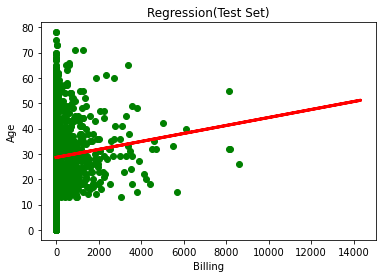

In [10]:
plt.scatter(X_test,y_test,color="green") # Plot a graph with X_test vs y_test
plt.plot(X_train,model.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('Billing')
plt.ylabel('Age')
plt.show()

In [11]:
model.score(X_test, y_test)

0.002256210923863744

In [12]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.027296587926509186

In [29]:
y_hat = clf.predict(X_test)
print('Predict: %.3f' % y_hat[0])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat))
print("r2_score: %.2f" % r2_score(y_test, y_hat))

Predict: 21.000
Mean squared error: 295.41
r2_score: -0.45


In [13]:
df = pd.read_csv(r"C:\Users\Darya\spaceship-titanic\train.csv")

In [14]:
df_with_categorical = df.drop(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin','Destination', 'VIP', 'Name', 'Transported' ], axis =1)

In [15]:
df_without_categorical = df_without_categorical.dropna()

In [16]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [17]:
!pip install category_encoders

You should consider upgrading via the 'C:\Games\conda\python.exe -m pip install --upgrade pip' command.


In [32]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

target_enco = TargetEncoder()

category = df[["Transported","PassengerId","HomePlanet","Cabin","Destination","Name"]]
category["Transported"] = category["Transported"].astype(int)
category

C:\Games\conda\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Games\conda\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
C:\Users\Darya\AppData\Local\Temp/ipykernel_11964/949688943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category["Transported"] = category["Transported"

,Transported,PassengerId,HomePlanet,Cabin,Destination,Name
0,0,0001_01,Europa,B/0/P,TRAPPIST-1e,Maham Ofracculy
1,1,0002_01,Earth,F/0/S,TRAPPIST-1e,Juanna Vines
2,0,0003_01,Europa,A/0/S,TRAPPIST-1e,Altark Susent
3,0,0003_02,Europa,A/0/S,TRAPPIST-1e,Solam Susent
4,1,0004_01,Earth,F/1/S,TRAPPIST-1e,Willy Santantines
...,...,...,...,...,...,...
8688,0,9276_01,Europa,A/98/P,55 Cancri e,Gravior Noxnuther
8689,0,9278_01,Earth,G/1499/S,PSO J318.5-22,Kurta Mondalley
8690,1,9279_01,Earth,G/1500/S,TRAPPIST-1e,Fayey Connon
8691,0,9280_01,Europa,E/608/S,55 Cancri e,Celeon Hontichre


In [33]:
category = target_enco.fit_transform(category, category['Transported'])
category

,Transported,PassengerId,HomePlanet,Cabin,Destination,Name
0,0,0.503624,0.658846,0.503624,0.471175,0.503624
1,1,0.503624,0.423946,0.503624,0.471175,0.503624
2,0,0.503624,0.658846,0.135445,0.471175,0.503624
3,0,0.503624,0.658846,0.135445,0.471175,0.503624
4,1,0.503624,0.423946,0.503624,0.471175,0.503624
...,...,...,...,...,...,...
8688,0,0.503624,0.658846,0.503624,0.610000,0.503624
8689,0,0.503624,0.423946,0.503624,0.503769,0.503624
8690,1,0.503624,0.423946,0.503624,0.471175,0.503624
8691,0,0.503624,0.658846,0.500975,0.610000,0.503624


In [34]:
category_x, category_y = category.drop(columns="Transported"), category["Transported"]

category_x_train, category_x_test = category_x[:-250], category_x[-250:]
category_y_train, category_y_test = category_y[:-250], category_y[-250:]

model_2 = GradientBoostingClassifier()
model_2.fit(category_x_train, category_y_train)
y_hat2 = model_2.predict(category_x_test)

print('Predict: %.3f' % y_hat2[0])
print("Mean squared error: %.2f" % mean_squared_error(category_y_test, y_hat2))
print("r2_score: %.2f" % r2_score(category_y_test, y_hat2))

Predict: 0.000
Mean squared error: 0.34
r2_score: -0.38


In [35]:
onehot = OneHotEncoder()

category_ = df[["Transported","PassengerId","HomePlanet","Cabin","Destination","Name"]]
category_["Transported"] = category_["Transported"].astype(int)
category_ = pd.get_dummies(category_, columns=["PassengerId","HomePlanet","Cabin","Destination","Name"])
category_

C:\Users\Darya\AppData\Local\Temp/ipykernel_11964/3511552993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_["Transported"] = category_["Transported"].astype(int)


,Transported,PassengerId_0001_01,PassengerId_0002_01,PassengerId_0003_01,PassengerId_0003_02,PassengerId_0004_01,PassengerId_0005_01,PassengerId_0006_01,PassengerId_0006_02,PassengerId_0007_01,...,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8690,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
category_x, category_y = category_.drop(columns="Transported"), category_["Transported"]

category_x_train, category_x_test = category_x[:-250], category_x[-250:]
category_y_train, category_y_test = category_y[:-250], category_y[-250:]

model_3 = GradientBoostingClassifier()
model_3.fit(category_x_train, category_y_train)
y_hat3 = model_3.predict(category_x_test)

print('Predict: %.3f' % y_hat3[0])
print("Mean squared error: %.2f" % mean_squared_error(category_y_test, y_hat3))
print("r2_score: %.2f" % r2_score(category_y_test, y_hat3))

Predict: 21.000
Mean squared error: 0.42
r2_score: -0.68


In [57]:
from sklearn.preprocessing import StandardScaler

features = ["VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
df = df.dropna()
x = df.loc[:, features].values
y = df.loc[:, ['Age']].values

x = StandardScaler().fit_transform(x)
x = StandardScaler().fit_transform(x)

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Age']]], axis=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

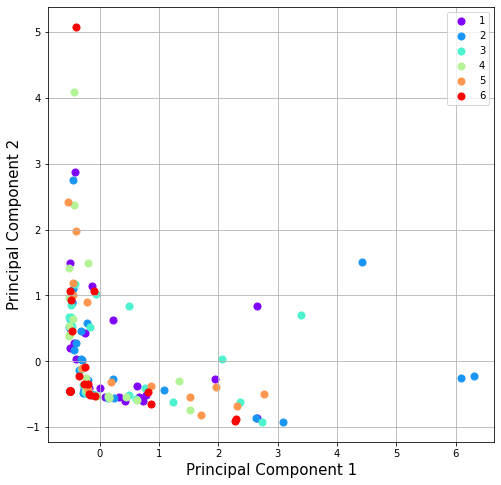

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
targets = [1, 2, 3, 4, 5, 6]
colors = cm.rainbow(np.linspace(0, 1, 6))

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Age'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 1'], 
        finalDf.loc[indicesToKeep, 'principal component 2'], 
        c = color,
        s = 50,
        )
    
ax.legend(targets)
ax.grid()